In [2]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de las gráficas
sns.set_theme()


# Resistencia

In [3]:
# Cargar los datos de la resistencia
resistencia_df = pd.read_excel('Lab_3_datos_organizados.xlsx', sheet_name='Resistencia', usecols='C,D,F,G')
resistencia_df 


,voltaje_R_V,error_voltaje_R_V,corriente_R_mA,error_corriente_R_mA
0,0.56,0.03280,0.25,0.03125
1,1.02,0.03510,0.47,0.03235
2,1.52,0.03760,0.70,0.03350
3,2.04,0.04020,0.94,0.03470
4,2.54,0.04270,1.17,0.03585
5,3.01,0.04505,1.39,0.03695
6,3.52,0.04760,1.62,0.03810
7,4.04,0.05020,1.86,0.03930
8,4.54,0.05270,2.10,0.04050
9,5.04,0.05520,2.33,0.04165


In [4]:
# Conversión de unidades
resistencia_df[['corriente_R_A','error_corriente_R_A']] = resistencia_df[['corriente_R_mA','error_corriente_R_mA']] * 1e-3
resistencia_df


,voltaje_R_V,error_voltaje_R_V,corriente_R_mA,error_corriente_R_mA,corriente_R_A,error_corriente_R_A
0,0.56,0.03280,0.25,0.03125,0.00025,0.000031
1,1.02,0.03510,0.47,0.03235,0.00047,0.000032
2,1.52,0.03760,0.70,0.03350,0.00070,0.000034
3,2.04,0.04020,0.94,0.03470,0.00094,0.000035
4,2.54,0.04270,1.17,0.03585,0.00117,0.000036
5,3.01,0.04505,1.39,0.03695,0.00139,0.000037
6,3.52,0.04760,1.62,0.03810,0.00162,0.000038
7,4.04,0.05020,1.86,0.03930,0.00186,0.000039
8,4.54,0.05270,2.10,0.04050,0.00210,0.000041
9,5.04,0.05520,2.33,0.04165,0.00233,0.000042


In [5]:
# Interpolación lineal de los datos de la resistencia
x_R = resistencia_df.voltaje_R_V
y_R = resistencia_df.corriente_R_A

coeficientes_R, M_cov_R = np.polyfit(x_R, y_R, 1, cov=True)
m_R, b_R = coeficientes_R
error_m_R, error_b_R = np.sqrt(np.diag(M_cov_R))

R = 1/m_R
error_R = error_m_R / (m_R**2)

print(f'''Regresión lineal:
{'-'*40}
Pendiente: ({m_R :.2g} ± {error_m_R: .2g})
Intercepto: ({b_R : .2g} ± {error_b_R : .2g})
Resistencia: ({R :.2g} ± {error_R : .2g}) [Ω]''')


Regresión lineal:
----------------------------------------
Pendiente: (nan ±  nan)
Intercepto: ( nan ±  nan)
Resistencia: (nan ±  nan) [Ω]


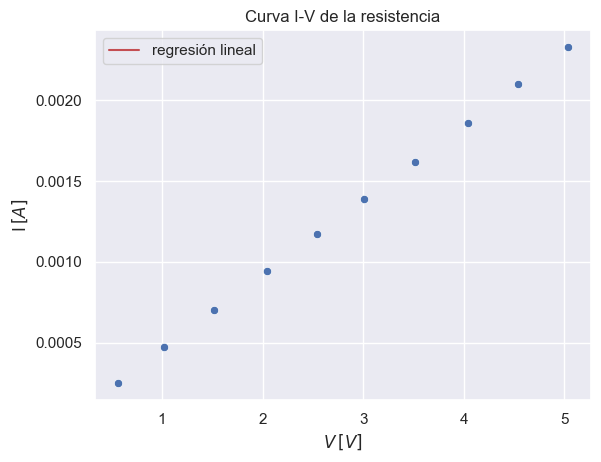

In [6]:
# Generar gráfico I vs V del diodo linealizado
sns.scatterplot(data=resistencia_df, x='voltaje_R_V', y= 'corriente_R_A')
sns.lineplot(x= x_R, y= (m_R * x_R) + b_R, color= 'r', label='regresión lineal', linestyle='-')

plt.title('Curva I-V de la resistencia')
plt.xlabel(r'$V\:[V]$')
plt.ylabel(r'$\mathrm{I}\:[A]$')
plt.show()

# Diodo

In [7]:
# Cargar los datos del diodo
diodo_df = pd.read_excel('Lab_3_datos_organizados.xlsx', sheet_name='Diodo', usecols='B,C,E,F')
diodo_df 


,corriente_diodo_mA,error_corriente_diodo_mA,voltaje_diodo_V,error_voltaje_diodo_V
0,0.000,0.030000,0.140,0.03070
1,0.010,0.030050,0.294,0.03147
2,0.015,0.030075,0.400,0.03200
3,0.056,0.030280,0.460,0.03230
4,0.240,0.031200,0.550,0.03275
5,0.346,0.031730,0.570,0.03285
6,0.690,0.033450,0.650,0.03325
7,0.801,0.034005,0.680,0.03340
8,1.193,0.035965,0.730,0.03365
9,1.540,0.037700,0.780,0.03390


In [8]:
# Conversión de unidades
diodo_df[['corriente_diodo_A','error_corriente_diodo_A']] = diodo_df[['corriente_diodo_mA','error_corriente_diodo_mA']] * 1e-3
diodo_df


,corriente_diodo_mA,error_corriente_diodo_mA,voltaje_diodo_V,error_voltaje_diodo_V,corriente_diodo_A,error_corriente_diodo_A
0,0.000,0.030000,0.140,0.03070,0.000000,0.000030
1,0.010,0.030050,0.294,0.03147,0.000010,0.000030
2,0.015,0.030075,0.400,0.03200,0.000015,0.000030
3,0.056,0.030280,0.460,0.03230,0.000056,0.000030
4,0.240,0.031200,0.550,0.03275,0.000240,0.000031
5,0.346,0.031730,0.570,0.03285,0.000346,0.000032
6,0.690,0.033450,0.650,0.03325,0.000690,0.000033
7,0.801,0.034005,0.680,0.03340,0.000801,0.000034
8,1.193,0.035965,0.730,0.03365,0.001193,0.000036
9,1.540,0.037700,0.780,0.03390,0.001540,0.000038


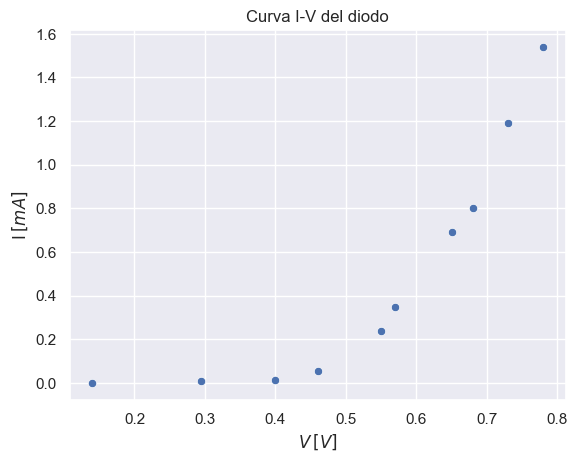

In [9]:
# Generar gráfico I vs V del diodo
sns.scatterplot(data=diodo_df, x='voltaje_diodo_V', y= 'corriente_diodo_mA')
plt.title('Curva I-V del diodo')
plt.xlabel(r'$V\:[V]$')
plt.ylabel(r'$\mathrm{I}\:[mA]$')
plt.show()


In [10]:
# Aproximar el valor de v_on
v1, i1 = diodo_df[['voltaje_diodo_V', 'corriente_diodo_mA']].iloc[8]
v2, i2 = diodo_df[['voltaje_diodo_V', 'corriente_diodo_mA']].iloc[7]

v_on = v1 + ((v2 -v1) * ((1 - i1) / (i2 - i1)))

v_on

0.7053826530612245

In [11]:
# Linealización de la gráfica I vs V del diodo
filtro = diodo_df.corriente_diodo_A > 0
diodo_df[['ln_corriente_diodo_mA', 'ln_corriente_diodo_A']] = np.log(diodo_df[['corriente_diodo_mA', 'corriente_diodo_A']][filtro])
diodo_df['error_ln_corriente_diodo_A'] = diodo_df['error_corriente_diodo_A'][filtro] / diodo_df['corriente_diodo_A'][filtro]
diodo_df['error_ln_corriente_diodo_mA'] = diodo_df.error_ln_corriente_diodo_A * 1e3

diodo_df


,corriente_diodo_mA,error_corriente_diodo_mA,voltaje_diodo_V,error_voltaje_diodo_V,corriente_diodo_A,error_corriente_diodo_A,ln_corriente_diodo_mA,ln_corriente_diodo_A,error_ln_corriente_diodo_A,error_ln_corriente_diodo_mA
0,0.000,0.030000,0.140,0.03070,0.000000,0.000030,NaN,NaN,NaN,NaN
1,0.010,0.030050,0.294,0.03147,0.000010,0.000030,-4.605170,-11.512925,3.005000,3005.000000
2,0.015,0.030075,0.400,0.03200,0.000015,0.000030,-4.199705,-11.107460,2.005000,2005.000000
3,0.056,0.030280,0.460,0.03230,0.000056,0.000030,-2.882404,-9.790159,0.540714,540.714286
4,0.240,0.031200,0.550,0.03275,0.000240,0.000031,-1.427116,-8.334872,0.130000,130.000000
5,0.346,0.031730,0.570,0.03285,0.000346,0.000032,-1.061317,-7.969072,0.091705,91.705202
6,0.690,0.033450,0.650,0.03325,0.000690,0.000033,-0.371064,-7.278819,0.048478,48.478261
7,0.801,0.034005,0.680,0.03340,0.000801,0.000034,-0.221894,-7.129650,0.042453,42.453184
8,1.193,0.035965,0.730,0.03365,0.001193,0.000036,0.176471,-6.731284,0.030147,30.146689
9,1.540,0.037700,0.780,0.03390,0.001540,0.000038,0.431782,-6.475973,0.024481,24.480519


In [12]:
# Interpolación lineal de los datos del diodo
diodo_df.dropna(inplace=True)

x_D = diodo_df.voltaje_diodo_V
y_D = diodo_df.ln_corriente_diodo_A

coeficientes_D, M_cov_D = np.polyfit(x_D, y_D, 1, cov=True)
m_D, b_D = coeficientes_D
error_m_D, error_b_D = np.sqrt(np.diag(M_cov_D))

v_T = 25.85e-3
n = 1 / (m_D * v_T)
error_n = (error_m_D) / ((m_D ** 2) * v_T)

print(f'''Regresión lineal:
{'-'*40}
Pendiente 1 / nV_t: ({m_D :.2g} ± {error_m_D: .2g})
Intercepto ln(I_s): ({b_D : .2g} ± {error_b_D : .2g})
Factor de idealidad n:({n : .2g} ± {error_n : .2g}) ''')


Regresión lineal:
----------------------------------------
Pendiente 1 / nV_t: (12 ±  0.89)
Intercepto ln(I_s): (-15 ±  0.52)
Factor de idealidad n:( 3.4 ±  0.26) 


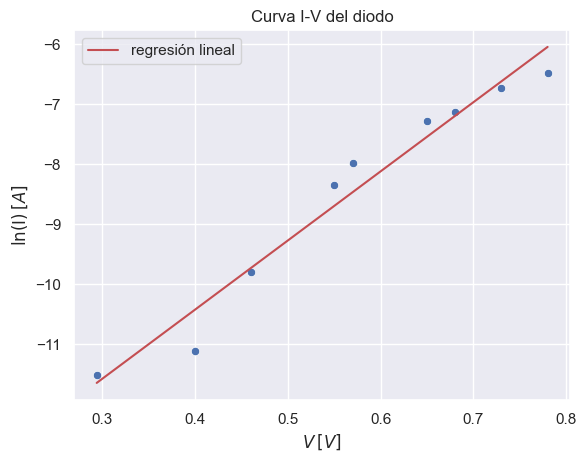

In [16]:
# Generar gráfico I vs V del diodo linealizado
sns.scatterplot(data=diodo_df, x='voltaje_diodo_V', y= 'ln_corriente_diodo_A')
sns.lineplot(x= x_D, y= (m_D * x_D) + b_D, color= 'r', label='regresión lineal', linestyle='-')
# plt.errorbar(x= diodo_df.voltaje_diodo_V, y= diodo_df.ln_corriente_diodo_A, xerr= diodo_df.error_voltaje_diodo_V, yerr=diodo_df.error_ln_corriente_diodo_A, fmt='none', ecolor="#000000", capsize=3)

plt.title('Curva I-V del diodo')
plt.xlabel(r'$V\:[V]$')
plt.ylabel(r'$\ln(\mathrm{I})\:[A]$')
plt.show()

# Filamento de W

In [14]:
# Cargar los datos del diodo
filamento_df = pd.read_excel('Lab_3_datos_organizados.xlsx', sheet_name='Filamento_de_W', usecols='C,D,F,G')
filamento_df 


,corriente_filamento_mA,error_corriente_filamento_mA,voltaje_filamento_V,error_voltaje_filamento_V
0,33.9,0.1995,0.27,0.03135
1,48.2,0.271,0.71,0.03355
2,57.5,0.3175,1.10,0.0355
3,67.6,0.368,1.50,0.0375
4,78.4,0.422,2.10,0.0405
5,87.5,0.4675,2.50,0.0425
6,97.2,0.516,3.01,0.04505
7,103.7,0.5485,3.45,0.04725
8,113.5,0.5975,4.00,0.05
9,121.6,0.638,4.50,0.0525


In [15]:
# Conversión de unidades
filamento_df[['corriente_filamento_A','error_corriente_filamento_A']] = filamento_df[['corriente_filamento_mA','error_corriente_filamento_mA']] * 1e-3
filamento_df


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# Cálculo de la resistencia
filamento_df['resistencia_filamento_Ohm'] = filamento_df.voltaje_filamento_V / filamento_df.corriente_filamento_A

filamento_df['error_resistencia_filamento_Ohm'] = np.sqrt( 
    (( (filamento_df.error_voltaje_filamento_V) / (filamento_df.corriente_filamento_A) )**2) + 
    (( (filamento_df.voltaje_filamento_V * filamento_df.error_corriente_filamento_A) / (filamento_df.corriente_filamento_A ** 2) )**2) 
    )

filamento_df


,corriente_filamento_mA,error_corriente_filamento_mA,voltaje_filamento_V,error_voltaje_filamento_V,corriente_filamento_A,error_corriente_filamento_A,resistencia_filamento_Ohm,error_resistencia_filamento_Ohm
0,33.9,0.1995,0.27,0.03135,0.0339,0.000199,7.964602,0.925966
1,48.2,0.2710,0.71,0.03355,0.0482,0.000271,14.730290,0.700968
2,57.5,0.3175,1.10,0.03550,0.0575,0.000318,19.130435,0.626363
3,67.6,0.3680,1.50,0.03750,0.0676,0.000368,22.189349,0.567733
4,78.4,0.4220,2.10,0.04050,0.0784,0.000422,26.785714,0.536324
5,87.5,0.4675,2.50,0.04250,0.0875,0.000468,28.571429,0.509138
6,97.2,0.5160,3.01,0.04505,0.0972,0.000516,30.967078,0.491769
7,103.7,0.5485,3.45,0.04725,0.1037,0.000549,33.269045,0.488441
8,113.5,0.5975,4.00,0.05000,0.1135,0.000598,35.242291,0.478002
9,121.6,0.6380,4.50,0.05250,0.1216,0.000638,37.006579,0.473394


In [ ]:
# Estimación de la temperatura
T_0 = 293
alpha = 4.5e-3
R_0 = 5.9

filamento_df['temperatura_filamento_K'] = T_0 + ( ( (filamento_df.resistencia_filamento_Ohm / R_0) -1) / (alpha) )
filamento_df['error_temperatura_filamento_K'] =  (filamento_df.error_resistencia_filamento_Ohm) / (alpha * R_0)

filamento_df


,corriente_filamento_mA,error_corriente_filamento_mA,voltaje_filamento_V,error_voltaje_filamento_V,corriente_filamento_A,error_corriente_filamento_A,resistencia_filamento_Ohm,error_resistencia_filamento_Ohm,temperatura_filamento_K,error_temperatura_filamento_K
0,33.9,0.1995,0.27,0.03135,0.0339,0.000199,7.964602,0.925966,370.762779,34.876302
1,48.2,0.2710,0.71,0.03355,0.0482,0.000271,14.730290,0.700968,625.590978,26.401803
2,57.5,0.3175,1.10,0.03550,0.0575,0.000318,19.130435,0.626363,791.321461,23.591821
3,67.6,0.3680,1.50,0.03750,0.0676,0.000368,22.189349,0.567733,906.534806,21.383539
4,78.4,0.4220,2.10,0.04050,0.0784,0.000422,26.785714,0.536324,1079.655905,20.200545
5,87.5,0.4675,2.50,0.04250,0.0875,0.000468,28.571429,0.509138,1146.914447,19.176566
6,97.2,0.5160,3.01,0.04505,0.0972,0.000516,30.967078,0.491769,1237.146071,18.522358
7,103.7,0.5485,3.45,0.04725,0.1037,0.000549,33.269045,0.488441,1323.849165,18.397014
8,113.5,0.5975,4.00,0.05000,0.1135,0.000598,35.242291,0.478002,1398.171026,18.003829
9,121.6,0.6380,4.50,0.05250,0.1216,0.000638,37.006579,0.473394,1464.622559,17.830270


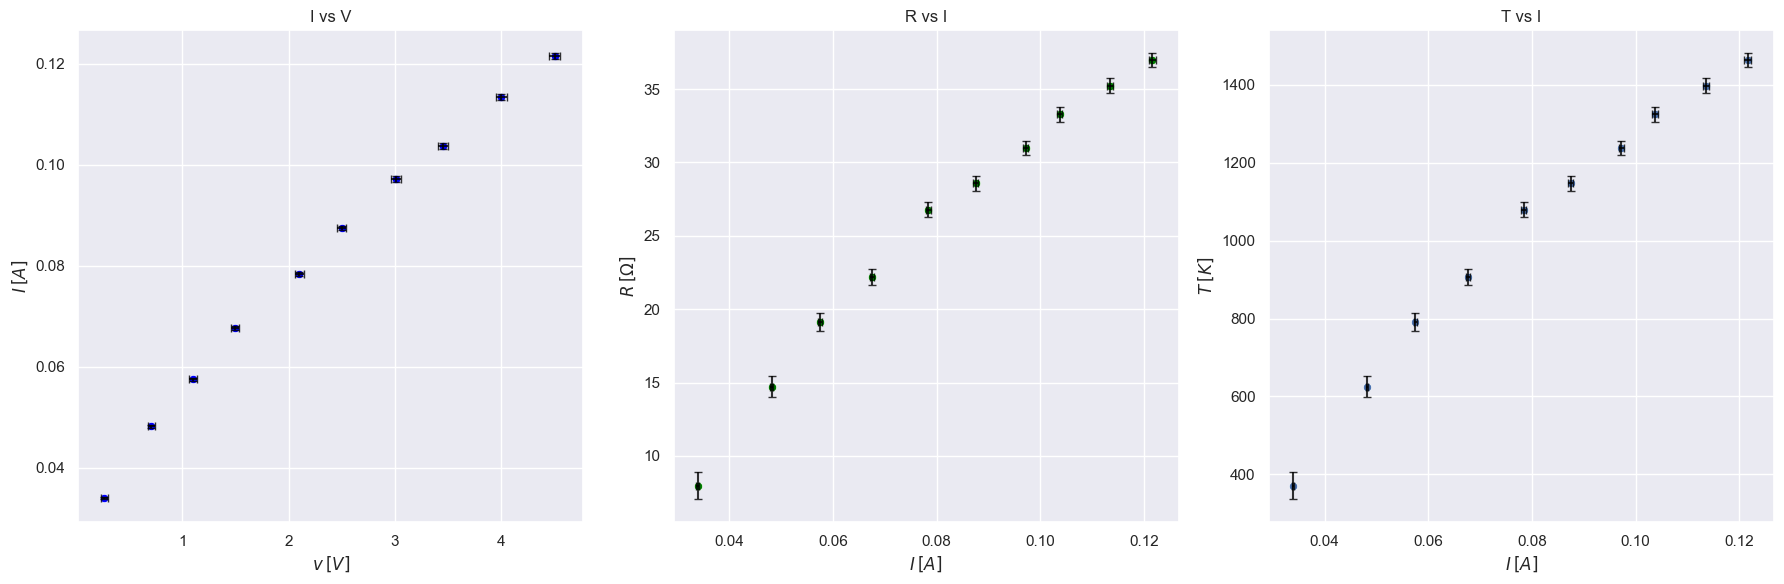

In [ ]:
# Creamos una figura con 3 subplots en una sola fila (1 fila, 3 columnas)
_, ax = plt.subplots(1, 3, figsize=(18, 6))  # Ancho x alto en pulgadas

# Primer gráfico
sns.scatterplot(data= filamento_df, x='voltaje_filamento_V', y='corriente_filamento_A', color='blue', ax=ax[0])
ax[0].set_title(f'I vs V')
ax[0].set_xlabel(r'$v\:[V]$')
ax[0].set_ylabel(r'$I\:[A]$')
ax[0].errorbar(
    filamento_df['voltaje_filamento_V'],
    filamento_df['corriente_filamento_A'],
    xerr=filamento_df['error_voltaje_filamento_V'],
    yerr=filamento_df['error_corriente_filamento_A'],
    fmt='none', ecolor='black', capsize=3, alpha=0.8
)

# Segundo gráfico
sns.scatterplot(data= filamento_df, x='corriente_filamento_A', y='resistencia_filamento_Ohm', color='green', ax=ax[1])
ax[1].set_title(f'R vs I')
ax[1].set_xlabel(r'$I\:[A]$')
ax[1].set_ylabel(r'$R\:[\Omega]$')
ax[1].errorbar(
    filamento_df['corriente_filamento_A'],
    filamento_df['resistencia_filamento_Ohm'],
    xerr=filamento_df['error_corriente_filamento_A'],
    yerr=filamento_df['error_resistencia_filamento_Ohm'],
    fmt='none', ecolor='black', capsize=3, alpha=0.8
)

# Tercer gráfico
sns.scatterplot(data= filamento_df, x='corriente_filamento_A', y='temperatura_filamento_K', ax=ax[2])
ax[2].set_title(f'T vs I')
ax[2].set_xlabel(r'$I\:[A]$')
ax[2].set_ylabel(r'$T\:[K]$')
ax[2].errorbar(
    filamento_df['corriente_filamento_A'],
    filamento_df['temperatura_filamento_K'],
    xerr=filamento_df['error_corriente_filamento_A'],
    yerr=filamento_df['error_temperatura_filamento_K'],
    fmt='none', ecolor='black', capsize=3, alpha=0.8
)

# Ajustar los espacios entre los subplots para evitar superposición
plt.tight_layout()
plt.show()


In [ ]:
filamento_df.to_excel('datos_con_temp.xlsx')